<a href="https://colab.research.google.com/github/sunheehee/DArt-B_academiccontest/blob/main/%5BDArt_B%5D_%ED%95%99%EC%88%A0%EC%A0%9C_%E2%91%A2%EB%AC%BC%EB%A5%98%EC%84%BC%ED%84%B0%EC%9E%85%EC%A7%80%EC%84%A0%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ③ 물류센터 입지 선정
- 산불 대피소를 모두 커버하면서 가장 먼 대피소까지의 거리를 최소화하는 단일 재해구호물류센터 건설을 위한 최적 입지 선정
- P-Center problem: 최대 이동 거리를 최소화하는 p개의 시설 위치를 찾는 방법

## 문제 정의

1. GIS에서 입지제한가능지역으로 선정된 n개의 포인트 중
2. p-center를 통해 최적의 입지를 선정.

- 사용 데이터
    - fire_shelter: 시설명, 실제커버인구, 위도, 경도, 시설ID
    - candidate: 주소, 경도, 위도, 센터ID

**[P-Center Problem]**

```python
I = [] # 수요지 리스트
J = [] # 후보지 리스트
d = { (i, j): ... for i in I for j in J } # 거리 행렬
p = 1 # 물센 수

# PuLP 라이브러리 사용
model = pulp.LpProblem("p-center_problem", pulp.LpMinimize)

# 변수 정의
x = pulp.LpVariable.dicts("x", J, cat="Binary")  # 시설 설치 여부
y = pulp.LpVariable.dicts("y", [(i, j) for i in I for j in J], cat="Binary")  # 수요지-시설 연결 여부
z = pulp.LpVariable("z", lowBound=0, cat="Continuous")  # 최대 거리 (목표 최소화 대상)

# 목적함수
model += z # 모든 수요지 중 가장 먼 거리 z를 최소화

# 제약 1. 수요지 i는 하나의 시설에 할당
for i in I:
    model += pulp.lpSum(y[(i, j)] for j in J) == 1

# 제약 2. 수요지는 선택된 시설에만 할당 가능
for i in I:
    for j in J:
        model += y[(i, j)] <= x[j]

# 제약 3: 정확히 p개의 시설 설치 / p = 1
model += pulp.lpSum(x[j] for j in J) == p

# 제약 4: 모든 수요지의 거리 ≤ z
## 수요지마다 할당된 거리의 가중합이 z보다 작거나 같아야 한다
for i in I:
    model += pulp.lpSum(d[(i, j)] * y[(i, j)] for j in J) <= z
```

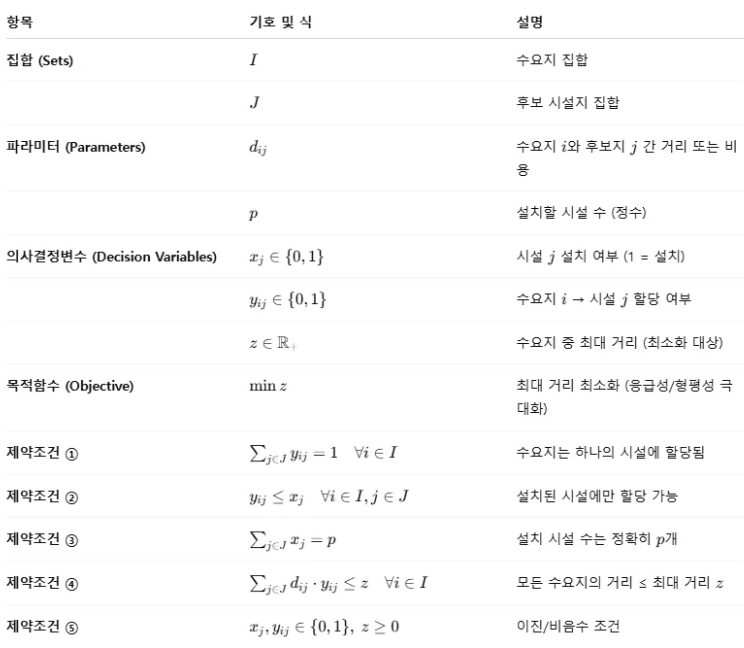

## 최적 입지 선정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

candidate = pd.read_csv('/content/drive/MyDrive/DArt-B 25-1 학술제 물류무역/최종입지후보_중심점.csv')
fire_shelter = pd.read_csv('/content/drive/MyDrive/DArt-B 25-1 학술제 물류무역/fire_shelter.csv')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
print(fire_shelter.head())
print('---')
print(candidate.head())

               시설명    실제커버인구       커버율    누적 커버율         위도          경도
0         안동서부초등학교  134049.0  0.104603  0.104603  36.567589  128.719171
1         안동영호초등학교  121451.0  0.094772  0.199375  36.560447  128.691795
2        안동문화예술의전당   72567.0  0.056626  0.256002  36.559490  128.725382
3           복주초등학교   68790.0  0.053679  0.309681  36.562997  128.698156
4  대구교육대학교안동부설초등학교   58522.0  0.045667  0.355348  36.569832  128.728742
---
                                MNUM  SGG_OID  COL_ADM_SE     NTFDATE  \
0  64700004717020250038UQA1300001001    29230       47170  20250206.0   
1  64700004717020250038UQA1300001001    29230       47170  20250206.0   
2  64700004717020250038UQA1300001001    29230       47170  20250206.0   
3  64700004717020250038UQA1300001001    29230       47170  20250206.0   
4  64700004717020250038UQA1300001001    29230       47170  20250206.0   

       ALIAS     REMARK    EMD_CD  COL_ADM__1 EMD_NM  SGG_OID_2  COL_ADM__2  \
0  ���ְ�����  ���ְ�����  47170340     47170.0 

### 전처리

In [ ]:
fire_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시설명     26 non-null     object 
 1   실제커버인구  26 non-null     float64
 2   커버율     26 non-null     float64
 3   누적 커버율  26 non-null     float64
 4   위도      26 non-null     float64
 5   경도      26 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB


In [ ]:
fire_shelter = fire_shelter[['시설명', '실제커버인구', '위도', '경도']]

In [ ]:
candidate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MNUM        7267 non-null   object 
 1   SGG_OID     7267 non-null   int64  
 2   COL_ADM_SE  7267 non-null   int64  
 3   NTFDATE     1090 non-null   float64
 4   ALIAS       280 non-null    object 
 5   REMARK      281 non-null    object 
 6   EMD_CD      7267 non-null   int64  
 7   COL_ADM__1  7266 non-null   float64
 8   EMD_NM      7267 non-null   object 
 9   SGG_OID_2   7267 non-null   int64  
 10  COL_ADM__2  1 non-null      float64
 11  layer       7267 non-null   object 
 12  path        7267 non-null   object 
 13  LINK_ID     7267 non-null   int64  
 14  F_NODE      7267 non-null   int64  
 15  T_NODE      7267 non-null   int64  
 16  LANES       7267 non-null   int64  
 17  ROAD_RANK   7267 non-null   int64  
 18  ROAD_TYPE   7267 non-null   int64  
 19  ROAD_NO     7267 non-null  

In [ ]:
# 중복제거하면 647개 행
candidate = candidate.drop_duplicates(subset=['longitude2', 'latitude2'], keep='first')
candidate.shape

(647, 44)

In [ ]:
# 안동시+행정구역+도로명=>주소
candidate['주소'] = '안동시 ' + candidate['EMD_NM'].astype(str) + ' ' + candidate['ROAD_NAME'].astype(str)
candidate = candidate.rename(columns={'longitude2': '경도', 'latitude2': '위도'})
candidate = candidate[['주소', '경도', '위도']]

<ipython-input-104-4fe3b6bfaa01>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate['주소'] = '안동시 ' + candidate['EMD_NM'].astype(str) + ' ' + candidate['ROAD_NAME'].astype(str)


In [ ]:
print(candidate.head())
print(fire_shelter.head())

              주소       경도      위도
0   안동시 풍천면 도청대로  128.501  36.568
7   안동시 풍천면 도청대로  128.501  36.569
12  안동시 풍천면 도청대로  128.504  36.567
13  안동시 풍천면 도청대로  128.507  36.566
14  안동시 풍천면 도청대로  128.499  36.568
               시설명    실제커버인구         위도          경도
0         안동서부초등학교  134049.0  36.567589  128.719171
1         안동영호초등학교  121451.0  36.560447  128.691795
2        안동문화예술의전당   72567.0  36.559490  128.725382
3           복주초등학교   68790.0  36.562997  128.698156
4  대구교육대학교안동부설초등학교   58522.0  36.569832  128.728742


In [ ]:
# 고유 ID 부여
candidate['센터ID'] = ['C' + str(i) for i in range(len(candidate))]
fire_shelter['시설ID'] = ['S' + str(i) for i in range(len(fire_shelter))]

<ipython-input-106-811987b191a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_shelter['시설ID'] = ['S' + str(i) for i in range(len(fire_shelter))]


In [ ]:
print(candidate.head(3))
print(fire_shelter.head(3))

              주소       경도      위도 센터ID
0   안동시 풍천면 도청대로  128.501  36.568   C0
7   안동시 풍천면 도청대로  128.501  36.569   C1
12  안동시 풍천면 도청대로  128.504  36.567   C2
         시설명    실제커버인구         위도          경도 시설ID
0   안동서부초등학교  134049.0  36.567589  128.719171   S0
1   안동영호초등학교  121451.0  36.560447  128.691795   S1
2  안동문화예술의전당   72567.0  36.559490  128.725382   S2


### 계산

In [ ]:
# !pip install osmnx
# !pip install pulp

In [ ]:
import osmnx as ox
import networkx as nx
import pulp
from tqdm import tqdm

In [ ]:
# OSM 도로망 로드
G = ox.graph_from_place("Andong, South Korea", network_type='drive')
# drive: 안동에서 자동차 운전 가능한 도로망만 불러오기

In [ ]:
# 각 좌표를 OSM 도로망 노드로 매핑
fire_shelter['노드'] = fire_shelter.apply(lambda row: ox.distance.nearest_nodes(G, row['경도'], row['위도']), axis=1)
candidate['노드'] = candidate.apply(lambda row: ox.distance.nearest_nodes(G, row['경도'], row['위도']), axis=1)

In [ ]:
# 집합 및 ID 매핑
I = fire_shelter['시설ID'].tolist()
J = candidate['센터ID'].tolist()

shelter_node = dict(zip(fire_shelter['시설ID'], fire_shelter['노드']))
candidate_node = dict(zip(candidate['센터ID'], candidate['노드']))

In [ ]:
# 수요량 (실제커버인구) 매핑
demand = dict(zip(fire_shelter['시설ID'], fire_shelter['실제커버인구']))

In [ ]:
# 거리 행렬 생성 (도로망 기반 거리, km)
d = {}
for i in tqdm(I, desc="도로망 거리 계산"):
    for j in J:
        try:
            dist = nx.shortest_path_length(G, shelter_node[i], candidate_node[j], weight='length') / 1000
        except Exception as e:
            print(f"거리 계산 실패: {i}-{j}, 사유: {e}")
            dist = float('inf')
        d[(i, j)] = dist

도로망 거리 계산: 100%|██████████| 26/26 [02:24<00:00,  5.54s/it]


In [ ]:
# p-center 최적화 모델 (수요 가중)
p = 1
model = pulp.LpProblem("weighted_p-center_problem", pulp.LpMinimize)

x = pulp.LpVariable.dicts("x", J, cat="Binary")  # 후보지 선택 여부
y = pulp.LpVariable.dicts("y", [(i, j) for i in I for j in J], cat="Binary")  # 할당 여부
z = pulp.LpVariable("z", lowBound=0, cat="Continuous")  # 최대 거리

model += z  # 목적함수

In [ ]:
# 제약조건
for i in I:
    model += pulp.lpSum(y[(i, j)] for j in J) == 1  # 수요지 하나에 할당
    model += pulp.lpSum(d[(i, j)] * demand[i] * y[(i, j)] for j in J) <= z  # 수요 가중 거리 제약

for i in I:
    for j in J:
        model += y[(i, j)] <= x[j]

model += pulp.lpSum(x[j] for j in J) == p

In [ ]:
# 최적화
model.solve()

1

### 결과

In [ ]:
selected_sites = [j for j in J if pulp.value(x[j]) > 0.5]
assignments = {i: j for i in I for j in J if pulp.value(y[(i, j)]) > 0.5}
selected_z = pulp.value(z)

print("선택된 후보지 센터ID:", selected_sites)
print(f"최소 최대 가중 거리 z = {selected_z:.2f} km")
print("수요지 할당 결과:")
for i, j in assignments.items():
    print(f"  - 수요지 {i} → 후보지 {j}")

선택된 후보지 센터ID: ['C372']
최소 최대 가중 거리 z = 545591.21 km
수요지 할당 결과:
  - 수요지 S0 → 후보지 C372
  - 수요지 S1 → 후보지 C372
  - 수요지 S2 → 후보지 C372
  - 수요지 S3 → 후보지 C372
  - 수요지 S4 → 후보지 C372
  - 수요지 S5 → 후보지 C372
  - 수요지 S6 → 후보지 C372
  - 수요지 S7 → 후보지 C372
  - 수요지 S8 → 후보지 C372
  - 수요지 S9 → 후보지 C372
  - 수요지 S10 → 후보지 C372
  - 수요지 S11 → 후보지 C372
  - 수요지 S12 → 후보지 C372
  - 수요지 S13 → 후보지 C372
  - 수요지 S14 → 후보지 C372
  - 수요지 S15 → 후보지 C372
  - 수요지 S16 → 후보지 C372
  - 수요지 S17 → 후보지 C372
  - 수요지 S18 → 후보지 C372
  - 수요지 S19 → 후보지 C372
  - 수요지 S20 → 후보지 C372
  - 수요지 S21 → 후보지 C372
  - 수요지 S22 → 후보지 C372
  - 수요지 S23 → 후보지 C372
  - 수요지 S24 → 후보지 C372


In [ ]:
candidate[candidate['센터ID'] == 'C372']

,주소,경도,위도,센터ID,노드
3551,안동시 당북동 제비원로,128.72,36.559,C372,4736672965
